# MPN - Exploratory Data Analysis

1. **Correlation Matrix**

2. **Principal Component Analysis (PCA)**

   2.1. Top Contributing Features to the 1st Principal Component
   
   2.2. Top Contributing Features to the 2nd Principal Component


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
merged = pd.read_pickle('merged_20.pkl')

## 1. Correlation matrix.

### Correlation matrix for 6 important columns. 

/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


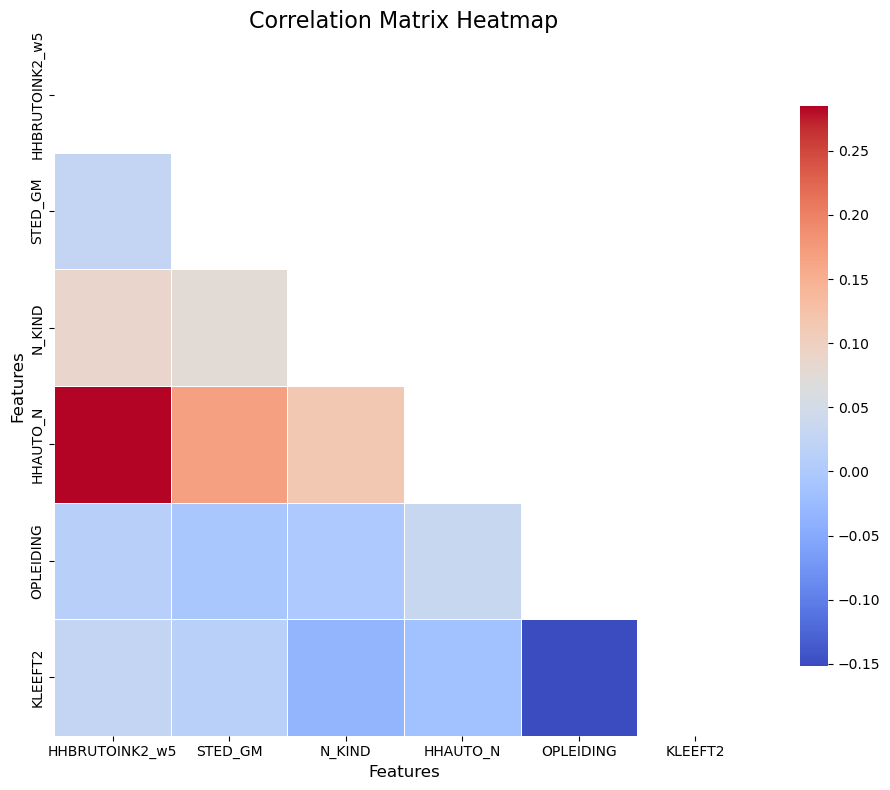

In [15]:
# Replace existing nan values
def replace_nan_with_mean(df):
    return df.fillna(df.mean())

merged_filled = replace_nan_with_mean(merged)

# Use 6 important columns
important_columns = ['HHBRUTOINK2_w5', 'STED_GM', 'N_KIND', 'HHAUTO_N', 'OPLEIDING', 'KLEEFT2']
c6_merged = merged_filled[important_columns].copy()

# Correlation matrix of 6 column dataframe
correlation_matrix = c6_merged.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f',
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})

plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

plt.tight_layout()
plt.show()

#### Column Descriptions for Correlation Matrix:

- **HHBRUTOINK2_w5:** Income
- **STED_GM:** Urbanisation
- **N_KIND:** Number of children
- **HHAUTO_N:** Number of cars
- **OPLEIDING:** Education
- **KLEEFT_2:** Age


## 2. Prinicipal Component Analysis.

/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/majamurawka/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning:

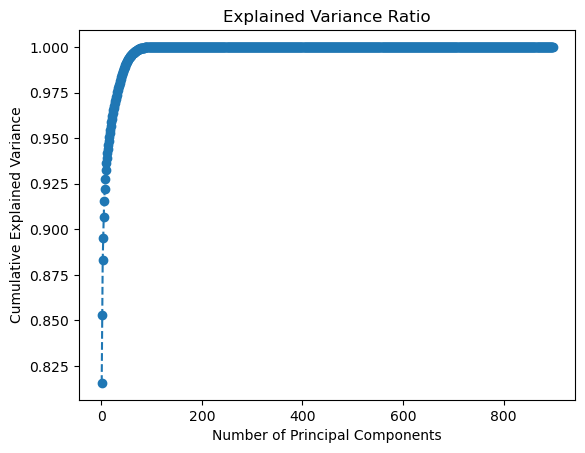

         PC1        PC2       PC3       PC4       PC5       PC6       PC7  \
0 -12.841485  17.317078  1.717137  2.856681 -0.464959 -3.045138  1.571955   
1 -12.938444  16.412148  1.632432  3.772489 -1.118630 -3.358112  2.257443   
2 -12.100007  16.595163  2.070377 -4.357505 -0.323553 -3.372654 -0.370514   
3 -13.138738  17.640430  2.186121  2.643666 -0.107141  2.579107  0.306999   
4 -13.196623  17.135865  2.236588  3.518280 -0.122177  2.268358  0.487369   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  2.775802 -6.970733 -1.097746  0.788594 -0.904497 -2.026298  1.646487   
1  1.854324 -9.508341  4.221784  0.399954 -0.527618 -1.366591  0.345595   
2 -0.683841 -9.737892 -1.823169  3.495754 -0.209035 -1.102006 -0.429085   
3  0.402241 -7.674933 -1.050345 -0.322495 -0.457694 -1.219169  1.833807   
4  0.626159 -9.824933 -1.497414 -1.284596 -0.269810 -1.380193  0.572287   

       PC15      PC16  HHAUTO_N  
0 -1.095749 -1.541361       1.0  
1 -0.457807 -1.201

KHVM           0.173447
KRVM           0.173441
VERPLNR        0.173392
AANTVPL        0.173385
TOER           0.173381
AANKPC2        0.173378
WEGGEWEEST     0.173378
AANTRIT        0.173377
VERTREKP       0.173377
SAMENREIZEN    0.173350
RitID          0.173347
VPLID          0.173347
VERPL          0.173342
RIT            0.173334
TOER_TYPE      0.173331
KMOTIEF        0.173322
HVM            0.173253
RVM            0.173229
MOTIEF         0.173211
DOEL           0.173148
dtype: float64

In [9]:
# Get target variable
target_variable = 'HHAUTO_N'
X = merged.drop(target_variable, axis=1)  
y = merged[target_variable]  

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Access explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = explained_var_ratio.cumsum()
n_components_to_retain = (cumulative_var_ratio < 0.95).sum() + 1

# Visualize explained variance ratio
plt.plot(range(1, len(explained_var_ratio) + 1), cumulative_var_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

# Fit PCA again with the determined number of components
pca_final = PCA(n_components=n_components_to_retain)
X_pca_final = pca_final.fit_transform(X_scaled)

# Create a DataFrame with the principal components
pc_columns = [f'PC{i}' for i in range(1, n_components_to_retain + 1)]
pc_df = pd.DataFrame(data=X_pca_final, columns=pc_columns)
result_df = pd.concat([pc_df, y.reset_index(drop=True)], axis=1)

# Print the final DataFrame with principal components and the target variable
print(result_df.head())

# Access the loadings of the first two principal components and put them in a datafram
loadings_first_two_pc = pca.components_[:2, :]
loadings_df = pd.DataFrame(loadings_first_two_pc.T, columns=['PC1', 'PC2'], index=X.columns)

#rank them from highest to lowest influence
loadings_abs = loadings_df.abs()
loadings_abs_sum = loadings_abs.sum(axis=1)
ranked_features = loadings_abs_sum.sort_values(ascending=False)
display(ranked_features.head(20))

##### Column Meanings:

- **KHVM:** Main transport mode class trip
- **KRVM:** Class trip-segment transport mode

- **VERPLNR:** Trip number
- **AANTVPL:** Number of trips per day
- **TOER:** Departure point of trip is arrival point of trip (round trip)
- **AANKPC2:** Trip Arrival postal code (PC2)

### Top contributing features to the 1st principal component.

In [10]:
# Standardize the data
features = ['HHID', 'HH_VALID', 'IMPHHDATA', 'DEELNAMEHH', 'JAAR', 'HHAUTO_N', 'AUTO1', 'AUTO1_KM', 'AUTO1_AANSCHAF', 'AUTO1_INRICHT', 'KILOMETRAGE', 'wlokatie_centrumsgw', 'wlokatie_opafrit', 'wlokatie_icknooppunt', 'wlokatie_station', 'wlokatie_metrosneltramhalte', 'wlokatie_tramhalte', 'wlokatie_bushalte4xpu', 'wlokatie_bushalte2xpu', 'wlokatie_bushalte1xpu', 'wlokatie_bushaltekl1xpu']

x = merged.loc[:, features].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

# Get loadings for the first principal component
loadings = pca.components_[0]

# Create a DataFrame to show the features and their loadings
loadings_df = pd.DataFrame({'Feature': features, 'Loading': loadings})
loadings_df = loadings_df.reindex(loadings_df['Loading'].abs().sort_values(ascending=False).index)

# Display the top contributing features
print("Top contributing features to the first principal component:")
print(loadings_df)


Top contributing features to the first principal component:
                        Feature       Loading
13         wlokatie_icknooppunt  3.841242e-01
11          wlokatie_centrumsgw  3.663229e-01
17        wlokatie_bushalte4xpu  3.448456e-01
18        wlokatie_bushalte2xpu  3.371635e-01
12             wlokatie_opafrit  3.212015e-01
19        wlokatie_bushalte1xpu  2.965620e-01
15  wlokatie_metrosneltramhalte  2.762608e-01
16           wlokatie_tramhalte  2.722241e-01
20      wlokatie_bushaltekl1xpu  2.547815e-01
14             wlokatie_station  2.301352e-01
5                      HHAUTO_N  1.138221e-01
10                  KILOMETRAGE -8.452766e-02
9                 AUTO1_INRICHT  6.307498e-02
1                      HH_VALID -3.534847e-02
6                         AUTO1  1.866767e-02
0                          HHID  1.674465e-02
2                     IMPHHDATA -1.671554e-02
3                    DEELNAMEHH -6.915703e-04
8                AUTO1_AANSCHAF -2.033019e-04
7                   

### Top contributing features to the 2nd principal component.

In [11]:
# Standardize the data
features = ['HHID', 'HH_VALID', 'IMPHHDATA', 'DEELNAMEHH', 'JAAR', 'HHAUTO_N', 'AUTO1', 'AUTO1_KM', 'AUTO1_AANSCHAF', 'AUTO1_INRICHT', 'KILOMETRAGE', 'wlokatie_centrumsgw', 'wlokatie_opafrit', 'wlokatie_icknooppunt', 'wlokatie_station', 'wlokatie_metrosneltramhalte', 'wlokatie_tramhalte', 'wlokatie_bushalte4xpu', 'wlokatie_bushalte2xpu', 'wlokatie_bushalte1xpu', 'wlokatie_bushaltekl1xpu']

x = merged.loc[:, features].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

# Get loadings for the first principal component
loadings = pca.components_[1]

# Create a DataFrame to show the features and their loadings
loadings_df = pd.DataFrame({'Feature': features, 'Loading': loadings})
loadings_df = loadings_df.reindex(loadings_df['Loading'].abs().sort_values(ascending=False).index)

# Display the top contributing features
print("Top contributing features to the second principal component:")
print(loadings_df)

Top contributing features to the second principal component:
                        Feature       Loading
2                     IMPHHDATA -5.471085e-01
6                         AUTO1  5.470104e-01
5                      HHAUTO_N -3.599751e-01
9                 AUTO1_INRICHT -3.543116e-01
1                      HH_VALID -3.325320e-01
10                  KILOMETRAGE  1.237072e-01
0                          HHID  1.004633e-01
3                    DEELNAMEHH -7.234250e-02
15  wlokatie_metrosneltramhalte  3.213754e-02
14             wlokatie_station -3.005672e-02
16           wlokatie_tramhalte  2.721347e-02
19        wlokatie_bushalte1xpu  2.576268e-02
18        wlokatie_bushalte2xpu  2.035808e-02
7                      AUTO1_KM -1.895736e-02
8                AUTO1_AANSCHAF -1.892400e-02
13         wlokatie_icknooppunt  1.795978e-02
17        wlokatie_bushalte4xpu  1.095188e-02
11          wlokatie_centrumsgw  1.032179e-02
12             wlokatie_opafrit  9.942130e-03
20      wlokatie_bu